In [2]:
import re 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [54]:
text = '''Machine learning is the study of computer algorithms that \
improve automatically through experience. It is seen as a \
subset of artificial intelligence. Machine learning algorithms \
build a mathematical model based on sample data, known as \
training data, in order to make predictions or decisions without \
being explicitly programmed to do so. Machine learning algorithms \
are used in a wide variety of applications, such as email filtering \
and computer vision, where it is difficult or infeasible to develop \
conventional algorithms to perform the needed tasks.'''

In [55]:
def tokenize(text):
    pattern = re.compile(r'[A-Za-z]+[\w^\']*|[\w^\']*[A-Za-z]+[\w^\']*')
    return pattern.findall(text.lower())


In [56]:
tokens = tokenize(text)
# tokens
print(len(set(tokens)), len(tokens))

60 84


In [57]:
def mapping(tokens):
    word_to_id = {}
    id_to_word = {}
    for num, token in enumerate(set(tokens)):
        word_to_id[token] = num
        id_to_word[num] = token
    return word_to_id, id_to_word

In [58]:
word_to_id, id_to_word = mapping(tokens)
# word_to_id

In [59]:
import numpy as np 
np.random.seed(42)
# encoding label 
def generate_training_data(tokens, word_to_id, window):
    x = []
    y = []
    n_tokens = len(tokens)

    for i in range(n_tokens):
        idx = concat(
            range(max(0, i - window), i),
            range(i, min(n_tokens, i + window + 1))
        )
        for j in idx:
            if i == j:
                continue
            x.append(one_hot_encode(word_to_id[tokens[i]], len(word_to_id)))
            y.append(one_hot_encode(word_to_id[tokens[j]], len(word_to_id)))
    return np.asarray(x), np.asarray(y)

In [60]:
def concat(*iterables):
    for iterable in iterables:
#         print(iterable)
        yield from iterable


In [61]:
def one_hot_encode(idx, vocab_size):
    res = [0]*vocab_size
    res[idx] = 1
    return res

In [62]:
x, y = generate_training_data(tokens, word_to_id, 2)
len(y[0])
# y

60

In [63]:
def init_network(vocab_size, n_embedding):
    model = {
        # np.random.randn (row, col)
        # weight1 (60,10): 60 rows and 10 columns have 60*10 weights to caculate linear regression to
        # cacalate logistic regression h1, h10.
        # weight2 h1...h10 and 10*60 weights to get h1.....h60
        
        "w1": np.random.randn(vocab_size, n_embedding),
        "w2": np.random.randn(n_embedding, vocab_size)
    }
    return model

In [64]:
model = init_network(len(word_to_id), 10)
# len(word_to_id)
# np.random.randn(2,1)
# np.random.randn(60, 10)

In [65]:
def forward(model, X, return_cache=True):
    cache = {}
    
    cache["a1"] = X @ model["w1"]
    cache["a2"] = cache["a1"] @ model["w2"]
    cache["z"] = softmax(cache["a2"])
    
    if not return_cache:
        return cache["z"]
    return cache
# FORWARD PASS
def forward_pass(self, x):
    h = np.dot(self.w1.T, x)
    u_c = np.dot(self.w2.T, h)
    y_c = self.softmax(u)

In [66]:
def softmax(X):
    res = []
    for x in X:
        exp = np.exp(x)
        res.append(exp / exp.sum())
    return res

In [67]:
# weight 1 to get h1..h10
(x @ model["w1"]).shape

(330, 10)

In [68]:
def backward(model, X, y, alpha):
    cache  = forward(model, X)
    da2 = cache["z"] - y
    dw2 = cache["a1"].T @ da2
    da1 = da2 @ model["w2"].T
    dw1 = X.T @ da1
    assert(dw2.shape == model["w2"].shape)
    assert(dw1.shape == model["w1"].shape)
    model["w1"] -= alpha * dw1
    model["w2"] -= alpha * dw2
    return cross_entropy(cache["z"], y)

In [69]:
def cross_entropy(z, y):
    return -np.sum(np.log(z)*y)

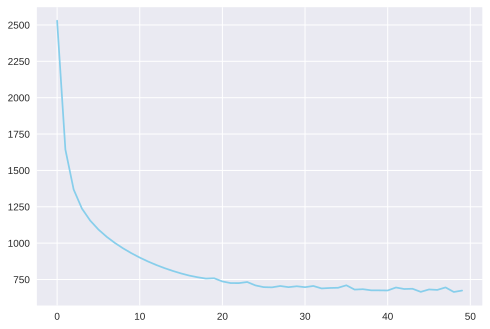

In [70]:
# using gradient descent to update w1 and w2 to get minimal error of each output
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use("seaborn")
n_iter = 50
learning_rate = 0.05

history = [backward(model, x, y, learning_rate) for _ in range(n_iter)]

plt.plot(range(len(history)), history, color="skyblue")
plt.show()
# loss function

In [74]:
learning = one_hot_encode(word_to_id["learning"], len(word_to_id))
result = forward(model, [learning], return_cache=False)[0]

for word in (id_to_word[id] for id in np.argsort(result)[::-1]):
    print(word)
    
# Using Word2Vec to buid Word Engine

the
machine
algorithms
intelligence
are
so
build
is
develop
do
a
or
it
conventional
perform
learning
used
seen
explicitly
artificial
order
applications
in
wide
experience
to
where
predictions
subset
study
infeasible
difficult
and
being
computer
tasks
make
programmed
vision
model
through
decisions
improve
variety
such
as
that
email
based
known
training
data
automatically
filtering
needed
mathematical
without
sample
of
on
